In [2]:
from scipy import stats
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

%matplotlib inline

In [2]:
application_train = pd.read_csv('/home/neha/Desktop/code/ML/Kaggle/home_credit_default_risk/data/application_train.csv') # (307511, 122)
application_test = pd.read_csv('/home/neha/Desktop/code/ML/Kaggle/home_credit_default_risk/data/application_test.csv') # (48744, 121)

In [6]:
(application_train.shape, application_test.shape)

((307511, 122), (48744, 121))

In [7]:
application_test.shape[0]/application_train.shape[0]

0.1585114028441259

In [3]:
list(application_train.columns)

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_A

In [15]:
application_train.TARGET.unique()

array([1, 0])

In [16]:
application_train.TARGET.value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

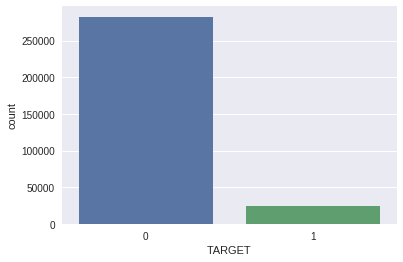

In [21]:
sns.countplot(application_train.TARGET)

### NAME_CONTRACT_TYPE 
___Identification if loan is cash or revolving___

In [24]:
application_train.NAME_CONTRACT_TYPE.unique()

array(['Cash loans', 'Revolving loans'], dtype=object)

In [26]:
application_test.NAME_CONTRACT_TYPE.unique()

array(['Cash loans', 'Revolving loans'], dtype=object)

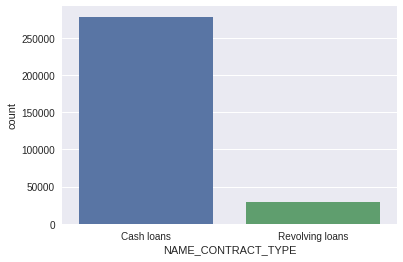

In [29]:
sns.countplot(application_train.NAME_CONTRACT_TYPE)

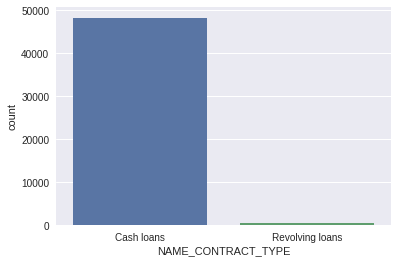

In [32]:
sns.countplot(application_test.NAME_CONTRACT_TYPE)

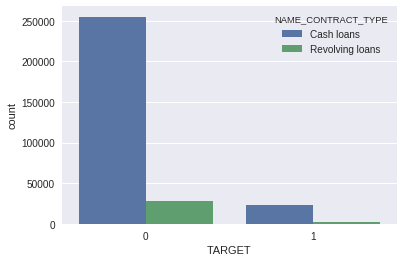

In [4]:
sns.countplot(x='TARGET',hue='NAME_CONTRACT_TYPE',data=application_train)

In [15]:
crosstab = pd.crosstab(application_train['NAME_CONTRACT_TYPE'], application_train['TARGET'])
crosstab

TARGET,0,1
NAME_CONTRACT_TYPE,,
Cash loans,255011,23221
Revolving loans,27675,1604


In [16]:
stats.chi2_contingency(crosstab)

(293.15054219964554,
 1.0235150721172847e-65,
 1,
 array([[ 255770.65910488,   22461.34089512],
        [  26915.34089512,    2363.65910488]]))

#### Summary of NAME_CONTRACT_TYPE: 
- Revolving loans are very less in test data
- there is very less correlation between loan type and target variable

### CODE_GENDER 
___Gender of the client___

In [17]:
application_train.CODE_GENDER.unique()

array(['M', 'F', 'XNA'], dtype=object)

In [18]:
application_test.CODE_GENDER.unique()

array(['F', 'M'], dtype=object)

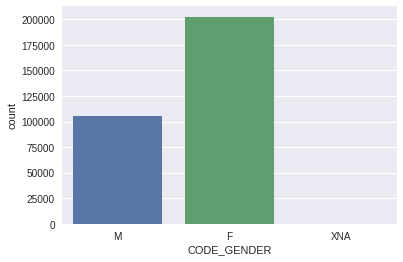

In [19]:
sns.countplot(application_train.CODE_GENDER)

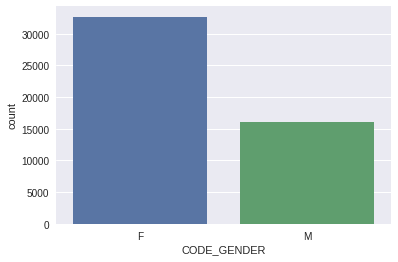

In [20]:
sns.countplot(application_test.CODE_GENDER)

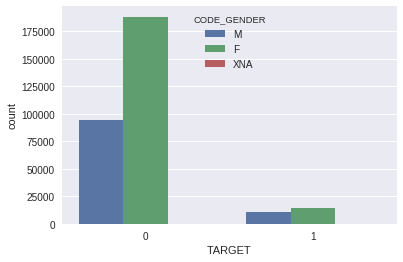

In [21]:
sns.countplot(x='TARGET',hue='CODE_GENDER',data=application_train)

In [25]:
crosstab = pd.crosstab(application_train[application_train.CODE_GENDER != 'XNA']['CODE_GENDER'], application_train[application_train.CODE_GENDER != 'XNA']['TARGET'])
crosstab

TARGET,0,1
CODE_GENDER,,
F,188278,14170
M,94404,10655


In [26]:
stats.chi2_contingency(crosstab)

(920.00572542498492,
 4.3940913399831119e-202,
 1,
 array([[ 186104.39936652,   16343.60063348],
        [  96577.60063348,    8481.39936652]]))

#### Summary of CODE_GENDER
- Females are more in the data
- Male defaulter are more in ratio as compared to female defaulters

### FLAG_OWN_CAR
___Flag if the client owns a car___

In [27]:
application_train.FLAG_OWN_CAR.unique()

array(['N', 'Y'], dtype=object)

In [28]:
application_test.FLAG_OWN_CAR.unique()

array(['N', 'Y'], dtype=object)

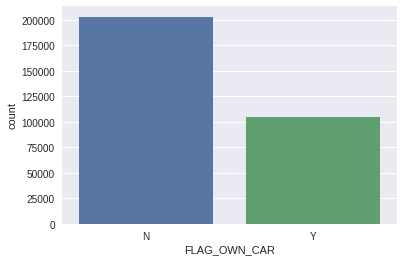

In [29]:
sns.countplot(application_train.FLAG_OWN_CAR)

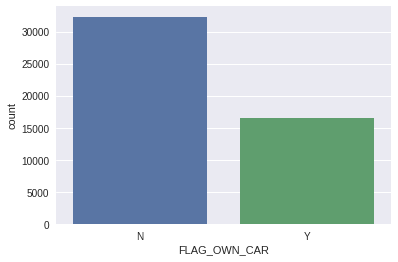

In [31]:
sns.countplot(application_test.FLAG_OWN_CAR)

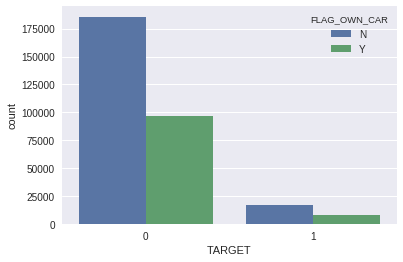

In [32]:
sns.countplot(x='TARGET',hue='FLAG_OWN_CAR',data=application_train)

In [34]:
crosstab = pd.crosstab(application_train['FLAG_OWN_CAR'], application_train['TARGET'])
crosstab

TARGET,0,1
FLAG_OWN_CAR,,
N,185675,17249
Y,97011,7576


In [37]:
stats.chi2_contingency(crosstab)

(146.65601825576024,
 9.3309944311096668e-34,
 1,
 array([[ 186542.18504054,   16381.81495946],
        [  96143.81495946,    8443.18504054]]))

### FLAG_OWN_REALTY
___Flag if client owns a house or flat___

In [38]:
application_train.FLAG_OWN_REALTY.unique()

array(['Y', 'N'], dtype=object)

In [40]:
application_test.FLAG_OWN_REALTY.unique()

array(['Y', 'N'], dtype=object)

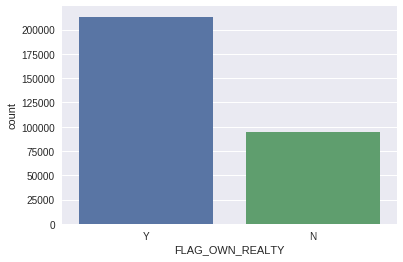

In [41]:
sns.countplot(application_train.FLAG_OWN_REALTY)

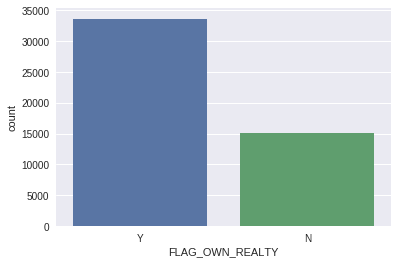

In [42]:
sns.countplot(application_test.FLAG_OWN_REALTY)

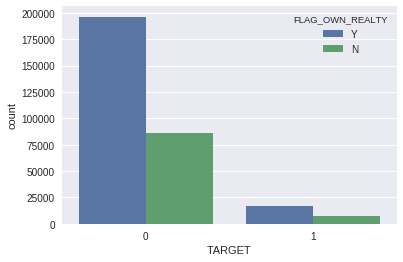

In [43]:
sns.countplot(x='TARGET',hue='FLAG_OWN_REALTY',data=application_train)

In [45]:
crosstab = pd.crosstab(application_train['FLAG_OWN_REALTY'], application_train['TARGET'])
crosstab

TARGET,0,1
FLAG_OWN_REALTY,,
N,86357,7842
Y,196329,16983


In [48]:
stats.chi2_contingency(crosstab)

(11.57582729808418,
 0.00066814703175458866,
 1,
 array([[  86594.42593598,    7604.57406402],
        [ 196091.57406402,   17220.42593598]]))

### CNT_CHILDREN
__Number of children the client has__

In [50]:
application_train.CNT_CHILDREN.unique()

array([ 0,  1,  2,  3,  4,  7,  5,  6,  8,  9, 11, 12, 10, 19, 14])

In [51]:
application_test.CNT_CHILDREN.unique()

array([ 0,  2,  1,  3,  8,  4,  6,  5,  7, 20, 11])

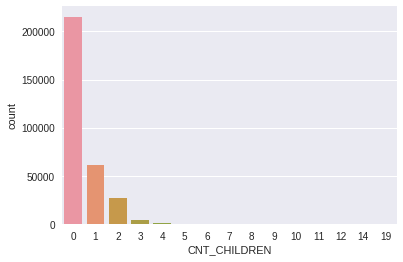

In [52]:
sns.countplot(application_train.CNT_CHILDREN)

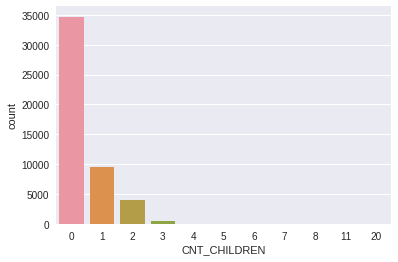

In [53]:
sns.countplot(application_test.CNT_CHILDREN)

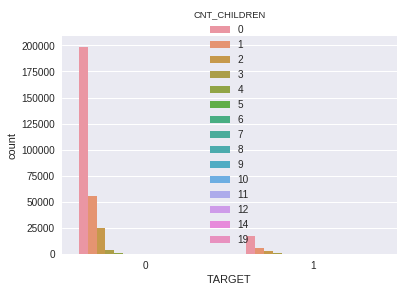

In [57]:
sns.countplot(x='TARGET',hue='CNT_CHILDREN',data=application_train)

In [59]:
crosstab = pd.crosstab(application_train['CNT_CHILDREN'], application_train['TARGET'])
crosstab

TARGET,0,1
CNT_CHILDREN,,
0,198762,16609
1,55665,5454
2,24416,2333
3,3359,358
4,374,55
5,77,7
6,15,6
7,7,0
8,2,0


### AMT_INCOME_TOTAL
__Income of the client__

In [69]:
application_train.AMT_INCOME_TOTAL.describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [72]:
application_train.AMT_INCOME_TOTAL.quantile([.1, 0.3, .5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99])

0.10     81000.0
0.30    112500.0
0.50    147150.0
0.60    162000.0
0.70    180000.0
0.80    225000.0
0.90    270000.0
0.95    337500.0
0.99    472500.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [74]:
application_test.AMT_INCOME_TOTAL.describe()

count    4.874400e+04
mean     1.784318e+05
std      1.015226e+05
min      2.694150e+04
25%      1.125000e+05
50%      1.575000e+05
75%      2.250000e+05
max      4.410000e+06
Name: AMT_INCOME_TOTAL, dtype: float64

In [75]:
application_test.AMT_INCOME_TOTAL.quantile([.1, 0.3, .5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99])

0.10     90000.0
0.30    126000.0
0.50    157500.0
0.60    180000.0
0.70    202500.0
0.80    225000.0
0.90    292500.0
0.95    360000.0
0.99    517500.0
Name: AMT_INCOME_TOTAL, dtype: float64

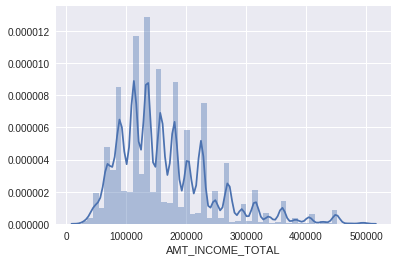

In [78]:
sns.distplot(application_train[application_train.AMT_INCOME_TOTAL < 500000.00].AMT_INCOME_TOTAL)

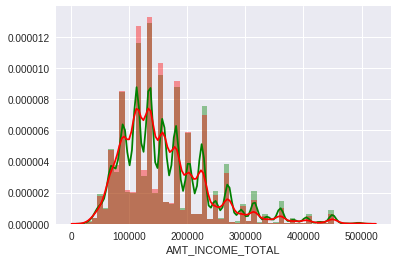

In [50]:
sns.distplot(application_train[(application_train.TARGET == 0) & (application_train.AMT_INCOME_TOTAL < 500000.00) ].AMT_INCOME_TOTAL, color='green')
sns.distplot(application_train[(application_train.TARGET == 1) & (application_train.AMT_INCOME_TOTAL < 500000.00) ].AMT_INCOME_TOTAL, color='red')

In [76]:
application_train[application_train.TARGET == 0].AMT_INCOME_TOTAL.quantile([.1, 0.3, .5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99])

0.10     81000.0
0.30    112500.0
0.50    148500.0
0.60    166500.0
0.70    185400.0
0.80    225000.0
0.90    270000.0
0.95    337500.0
0.99    486000.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [77]:
application_train[application_train.TARGET == 1].AMT_INCOME_TOTAL.quantile([.1, 0.3, .5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99])

0.10     81000.0
0.30    112500.0
0.50    135000.0
0.60    157500.0
0.70    180000.0
0.80    202500.0
0.90    256500.0
0.95    315000.0
0.99    450000.0
Name: AMT_INCOME_TOTAL, dtype: float64

#### Summary of Income
- Income distribution between people who default or not is same
- So loan paying is not entirely based on Income
- Is it more of a behaviour then ?

### EXT_SOURCE_3
__Normalized score from external data source__

In [87]:
(application_train.EXT_SOURCE_3.notnull().sum(), application_train.shape[0])

(246546, 307511)

In [83]:
application_train.EXT_SOURCE_3.describe()

count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64

In [84]:
application_test.EXT_SOURCE_3.describe()

count    40076.000000
mean         0.500106
std          0.189498
min          0.000527
25%          0.363945
50%          0.519097
75%          0.652897
max          0.882530
Name: EXT_SOURCE_3, dtype: float64

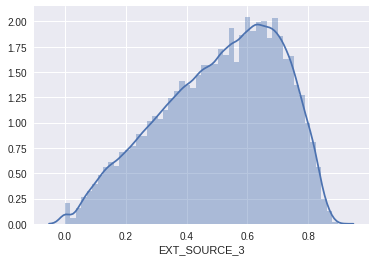

In [90]:
sns.distplot(application_train[application_train.EXT_SOURCE_3.notnull()].EXT_SOURCE_3)

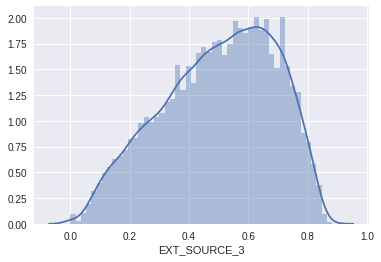

In [92]:
sns.distplot(application_test[application_test.EXT_SOURCE_3.notnull()].EXT_SOURCE_3)

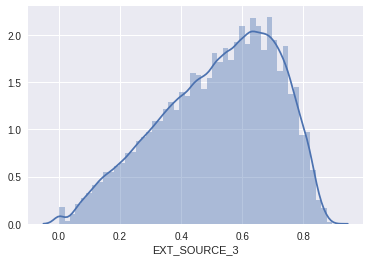

In [93]:
sns.distplot(application_train[application_train.EXT_SOURCE_3.notnull() & (application_train.TARGET == 0)].EXT_SOURCE_3)

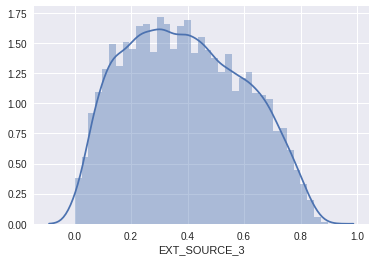

In [94]:
sns.distplot(application_train[application_train.EXT_SOURCE_3.notnull() & (application_train.TARGET == 1)].EXT_SOURCE_3)

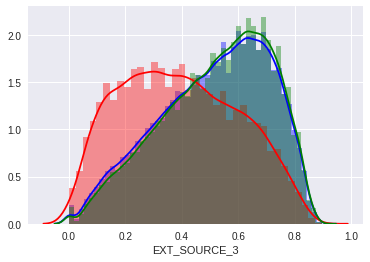

In [35]:
sns.distplot(application_train[application_train.EXT_SOURCE_3.notnull()].EXT_SOURCE_3, color='blue')
sns.distplot(application_train[application_train.EXT_SOURCE_3.notnull() & (application_train.TARGET == 1)].EXT_SOURCE_3, color='red')
sns.distplot(application_train[application_train.EXT_SOURCE_3.notnull() & (application_train.TARGET == 0)].EXT_SOURCE_3, color='green')

#### Summary of EXT_SOURCE_3
- values < 0.4 most of the people are defaulting
- variation explains the defaulting behavior

### Generated Feature - AMT_CREDIT/AMT_INCOME_TOTAL
__EDA for ratio of Loan Amount and Income__

In [55]:
application_train['loan_income_ratio']=application_train['AMT_CREDIT']/application_train['AMT_INCOME_TOTAL']
application_test['loan_income_ratio']=application_test['AMT_CREDIT']/application_test['AMT_INCOME_TOTAL']

In [53]:
application_train['loan_income_ratio'].describe()

count    307511.000000
mean          3.957570
std           2.689728
min           0.004808
25%           2.018667
50%           3.265067
75%           5.159880
max          84.736842
Name: loan_income_ratio, dtype: float64

In [56]:
application_test['loan_income_ratio'].describe()

count    48744.000000
mean         3.167544
std          2.137173
min          0.092500
25%          1.695695
50%          2.666143
75%          4.029600
max         30.445000
Name: loan_income_ratio, dtype: float64

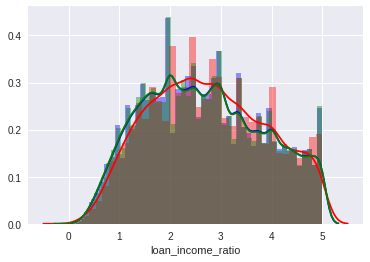

In [44]:
sns.distplot(application_train[(application_train.loan_income_ratio <= 5)].loan_income_ratio, color='blue')
sns.distplot(application_train[(application_train.loan_income_ratio <= 5) & (application_train.TARGET == 1)].loan_income_ratio, color='red')
sns.distplot(application_train[(application_train.loan_income_ratio <= 5) & (application_train.TARGET == 0)].loan_income_ratio, color='green')

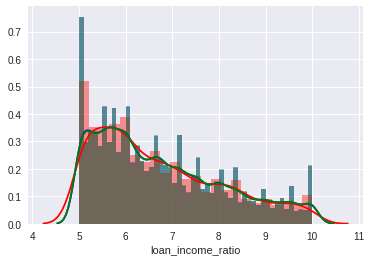

In [42]:
sns.distplot(application_train[(application_train.loan_income_ratio >= 5) & (application_train.loan_income_ratio <= 10)].loan_income_ratio, color='blue')
sns.distplot(application_train[(application_train.loan_income_ratio >= 5) & (application_train.loan_income_ratio <= 10) & (application_train.TARGET == 1)].loan_income_ratio, color='red')
sns.distplot(application_train[(application_train.loan_income_ratio >= 5) & (application_train.loan_income_ratio <= 10) & (application_train.TARGET == 0)].loan_income_ratio, color='green')

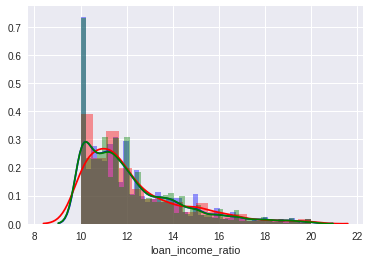

In [45]:
sns.distplot(application_train[(application_train.loan_income_ratio >= 10) & (application_train.loan_income_ratio <= 20)].loan_income_ratio, color='blue')
sns.distplot(application_train[(application_train.loan_income_ratio >= 10) & (application_train.loan_income_ratio <= 20) & (application_train.TARGET == 1)].loan_income_ratio, color='red')
sns.distplot(application_train[(application_train.loan_income_ratio >= 10) & (application_train.loan_income_ratio <= 20) & (application_train.TARGET == 0)].loan_income_ratio, color='green')

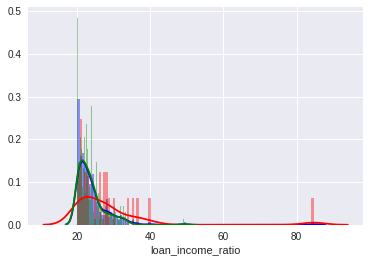

In [59]:
sns.distplot(application_train[(application_train.loan_income_ratio >= 20)].loan_income_ratio, color='blue', bins=100)
sns.distplot(application_train[(application_train.loan_income_ratio >= 20) & (application_train.TARGET == 1)].loan_income_ratio, color='red', bins=100)
sns.distplot(application_train[(application_train.loan_income_ratio >= 20) & (application_train.TARGET == 0)].loan_income_ratio, color='green', bins=100)

### NULL columns analysis 

In [41]:
null_columns = application_train.isnull().sum()/application_train.shape[0]
null_columns = null_columns[null_columns > 0.1]
null_columns.sort_values()

AMT_REQ_CREDIT_BUREAU_YEAR      0.135016
AMT_REQ_CREDIT_BUREAU_QRT       0.135016
AMT_REQ_CREDIT_BUREAU_MON       0.135016
AMT_REQ_CREDIT_BUREAU_WEEK      0.135016
AMT_REQ_CREDIT_BUREAU_DAY       0.135016
AMT_REQ_CREDIT_BUREAU_HOUR      0.135016
EXT_SOURCE_3                    0.198253
OCCUPATION_TYPE                 0.313455
EMERGENCYSTATE_MODE             0.473983
TOTALAREA_MODE                  0.482685
YEARS_BEGINEXPLUATATION_MEDI    0.487810
YEARS_BEGINEXPLUATATION_AVG     0.487810
YEARS_BEGINEXPLUATATION_MODE    0.487810
FLOORSMAX_MODE                  0.497608
FLOORSMAX_MEDI                  0.497608
FLOORSMAX_AVG                   0.497608
HOUSETYPE_MODE                  0.501761
LIVINGAREA_AVG                  0.501933
LIVINGAREA_MODE                 0.501933
LIVINGAREA_MEDI                 0.501933
ENTRANCES_MODE                  0.503488
ENTRANCES_MEDI                  0.503488
ENTRANCES_AVG                   0.503488
APARTMENTS_MEDI                 0.507497
APARTMENTS_MODE 

In [42]:
null_columns = application_test.isnull().sum()/application_test.shape[0]
null_columns = null_columns[null_columns > 0.1]
null_columns.sort_values()

AMT_REQ_CREDIT_BUREAU_YEAR      0.124097
AMT_REQ_CREDIT_BUREAU_DAY       0.124097
AMT_REQ_CREDIT_BUREAU_WEEK      0.124097
AMT_REQ_CREDIT_BUREAU_QRT       0.124097
AMT_REQ_CREDIT_BUREAU_HOUR      0.124097
AMT_REQ_CREDIT_BUREAU_MON       0.124097
EXT_SOURCE_3                    0.177827
OCCUPATION_TYPE                 0.320142
EXT_SOURCE_1                    0.421221
EMERGENCYSTATE_MODE             0.455625
TOTALAREA_MODE                  0.464139
YEARS_BEGINEXPLUATATION_AVG     0.468899
YEARS_BEGINEXPLUATATION_MEDI    0.468899
YEARS_BEGINEXPLUATATION_MODE    0.468899
FLOORSMAX_MEDI                  0.478438
FLOORSMAX_AVG                   0.478438
FLOORSMAX_MODE                  0.478438
LIVINGAREA_MODE                 0.483177
LIVINGAREA_MEDI                 0.483177
LIVINGAREA_AVG                  0.483177
ENTRANCES_MODE                  0.483731
ENTRANCES_MEDI                  0.483731
ENTRANCES_AVG                   0.483731
HOUSETYPE_MODE                  0.484552
APARTMENTS_AVG  

In [11]:
# if OWN_CAR_AGE is null when person not owns a Car ?
application_train[application_train.OWN_CAR_AGE.isnull()].FLAG_OWN_CAR.value_counts()

N    202924
Y         5
Name: FLAG_OWN_CAR, dtype: int64

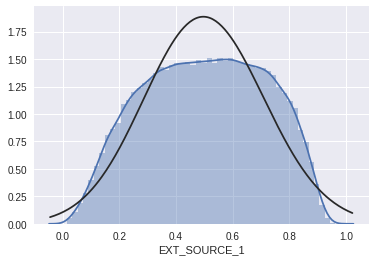

In [40]:
#distribution of EXT_SOURCE_1
sns.distplot(application_train[~application_train.EXT_SOURCE_1.isnull()].EXT_SOURCE_1, fit=stats.gamma)

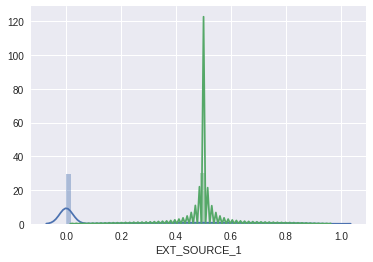

In [18]:
sns.distplot(application_train.EXT_SOURCE_1.fillna(0))
sns.distplot(application_train.EXT_SOURCE_1.fillna(0.5))

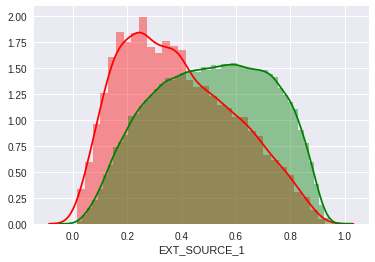

In [24]:
sns.distplot(application_train[(~application_train.EXT_SOURCE_1.isnull()) & (application_train.TARGET == 1)].EXT_SOURCE_1, color='red')
sns.distplot(application_train[(~application_train.EXT_SOURCE_1.isnull()) & (application_train.TARGET == 0)].EXT_SOURCE_1, color='green')

In [31]:
application_train[application_train.EXT_SOURCE_1.isnull()].TARGET.value_counts()/application_train.EXT_SOURCE_1.isnull().sum()

0    0.914805
1    0.085195
Name: TARGET, dtype: float64

In [56]:
application_train[~application_train.EXT_SOURCE_1.isnull()].TARGET.value_counts()/(~application_train.EXT_SOURCE_1.isnull()).sum()

0    0.925045
1    0.074955
Name: TARGET, dtype: float64

In [62]:
application_train[(~application_train.EXT_SOURCE_1.isnull())].groupby('NAME_INCOME_TYPE').EXT_SOURCE_1.agg({'mean':'mean', 'std':'std'})

,mean,std
NAME_INCOME_TYPE,,
Businessman,0.521988,0.121380
Commercial associate,0.500461,0.206816
Maternity leave,0.666147,0.215876
Pensioner,0.693047,0.161574
State servant,0.522977,0.202560
Student,0.420672,0.267348
Unemployed,0.416729,0.299629
Working,0.466842,0.203708


In [63]:
application_train[(~application_train.EXT_SOURCE_1.isnull())].groupby('OCCUPATION_TYPE').EXT_SOURCE_1.agg({'mean':'mean', 'std':'std'})


,mean,std
OCCUPATION_TYPE,,
Accountants,0.587270,0.193059
Cleaning staff,0.529939,0.194366
Cooking staff,0.455514,0.186630
Core staff,0.511520,0.202100
Drivers,0.392040,0.194184
HR staff,0.568683,0.204251
High skill tech staff,0.514134,0.203555
IT staff,0.503048,0.200937
Laborers,0.422053,0.200620


In [74]:
application_train[(~application_train.EXT_SOURCE_1.isnull()) & (application_train.NAME_INCOME_TYPE == 'Unemployed')].OCCUPATION_TYPE.unique()
application_train[(~application_train.EXT_SOURCE_1.isnull()) & (application_train.NAME_INCOME_TYPE == 'Student')].OCCUPATION_TYPE.unique()

array([nan, 'Drivers', 'Core staff', 'Laborers', 'Accountants',
       'Low-skill Laborers'], dtype=object)

In [77]:
application_train['NAME_INCOME_TYPE'] = application_train['NAME_INCOME_TYPE'].fillna('NA')
application_train['OCCUPATION_TYPE'] = application_train['OCCUPATION_TYPE'].fillna('NA')
application_train[(~application_train.EXT_SOURCE_1.isnull())].groupby(['NAME_INCOME_TYPE', 'OCCUPATION_TYPE']).size()

NAME_INCOME_TYPE      OCCUPATION_TYPE      
Businessman           Core staff                   1
                      Managers                     1
                      NA                           2
Commercial associate  Accountants               2525
                      Cleaning staff             289
                      Cooking staff              569
                      Core staff                3777
                      Drivers                   1754
                      HR staff                   133
                      High skill tech staff     1845
                      IT staff                   124
                      Laborers                  5694
                      Low-skill Laborers         131
                      Managers                  4872
                      Medicine staff             496
                      NA                        6434
                      Private service staff      535
                      Realty agents              181
  

In [35]:
application_train[application_train.EXT_SOURCE_3.isnull()].TARGET.value_counts()/application_train.EXT_SOURCE_3.isnull().sum()

0    0.906881
1    0.093119
Name: TARGET, dtype: float64

In [43]:
application_train[~application_train.EXT_SOURCE_3.isnull()].TARGET.value_counts()/(~application_train.EXT_SOURCE_3.isnull()).sum()

0    0.922335
1    0.077665
Name: TARGET, dtype: float64

### OCCUPATION_TYPE

In [45]:
application_train.OCCUPATION_TYPE.unique()

array(['Laborers', 'Core staff', 'Accountants', 'Managers', nan, 'Drivers',
       'Sales staff', 'Cleaning staff', 'Cooking staff',
       'Private service staff', 'Medicine staff', 'Security staff',
       'High skill tech staff', 'Waiters/barmen staff',
       'Low-skill Laborers', 'Realty agents', 'Secretaries', 'IT staff',
       'HR staff'], dtype=object)

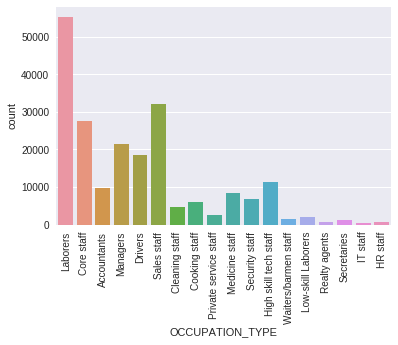

In [50]:
ax = sns.countplot(application_train.OCCUPATION_TYPE)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


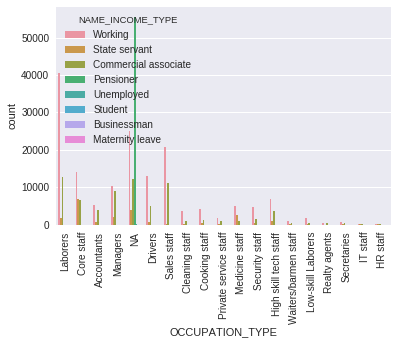

In [78]:
ax = sns.countplot(data = application_train, x = 'OCCUPATION_TYPE', hue='NAME_INCOME_TYPE')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

### ANNUTIY

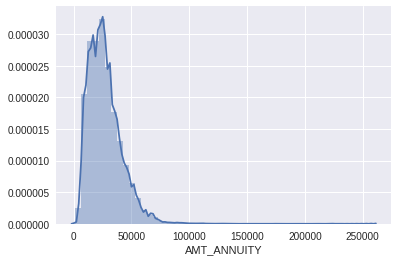

In [83]:
sns.distplot(application_train[~application_train.AMT_ANNUITY.isnull()].AMT_ANNUITY)

In [85]:
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


### APARTMENT Features

In [87]:
apartment_columns = ['APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
'YEARS_BUILD_AVG','COMMONAREA_AVG','ELEVATORS_AVG','ENTRANCES_AVG','FLOORSMAX_AVG','FLOORSMIN_AVG',
'LANDAREA_AVG','LIVINGAPARTMENTS_AVG','LIVINGAREA_AVG','NONLIVINGAPARTMENTS_AVG','NONLIVINGAREA_AVG',
'APARTMENTS_MODE','BASEMENTAREA_MODE','YEARS_BEGINEXPLUATATION_MODE','YEARS_BUILD_MODE','COMMONAREA_MODE',
'ELEVATORS_MODE','ENTRANCES_MODE','FLOORSMAX_MODE','FLOORSMIN_MODE','LANDAREA_MODE','LIVINGAPARTMENTS_MODE',
'LIVINGAREA_MODE','NONLIVINGAPARTMENTS_MODE','NONLIVINGAREA_MODE','APARTMENTS_MEDI','BASEMENTAREA_MEDI',
'YEARS_BEGINEXPLUATATION_MEDI','YEARS_BUILD_MEDI','COMMONAREA_MEDI','ELEVATORS_MEDI','ENTRANCES_MEDI',
'FLOORSMAX_MEDI','FLOORSMIN_MEDI','LANDAREA_MEDI','LIVINGAPARTMENTS_MEDI','LIVINGAREA_MEDI','NONLIVINGAPARTMENTS_MEDI',
'NONLIVINGAREA_MEDI','FONDKAPREMONT_MODE','HOUSETYPE_MODE','TOTALAREA_MODE','WALLSMATERIAL_MODE',
'EMERGENCYSTATE_MODE']


In [91]:
apartmen_null = application_test[apartment_columns].isnull().sum()/application_test.shape[0]
apartmen_null.sort_values()

EMERGENCYSTATE_MODE             0.455625
TOTALAREA_MODE                  0.464139
YEARS_BEGINEXPLUATATION_AVG     0.468899
YEARS_BEGINEXPLUATATION_MEDI    0.468899
YEARS_BEGINEXPLUATATION_MODE    0.468899
FLOORSMAX_MEDI                  0.478438
FLOORSMAX_AVG                   0.478438
FLOORSMAX_MODE                  0.478438
LIVINGAREA_MEDI                 0.483177
LIVINGAREA_AVG                  0.483177
LIVINGAREA_MODE                 0.483177
ENTRANCES_AVG                   0.483731
ENTRANCES_MEDI                  0.483731
ENTRANCES_MODE                  0.483731
HOUSETYPE_MODE                  0.484552
APARTMENTS_MEDI                 0.490050
APARTMENTS_AVG                  0.490050
APARTMENTS_MODE                 0.490050
WALLSMATERIAL_MODE              0.490173
ELEVATORS_MODE                  0.516761
ELEVATORS_AVG                   0.516761
ELEVATORS_MEDI                  0.516761
NONLIVINGAREA_AVG               0.535122
NONLIVINGAREA_MEDI              0.535122
NONLIVINGAREA_MO

In [115]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
apartment_object_columns = list(application_test[apartment_columns].select_dtypes(include=['object']).columns)
apartment_non_object_columns = list(set(apartment_columns) - set(apartment_object_columns))
pc_dims = pca.fit_transform(application_train[apartment_non_object_columns].fillna(0))
print(pca.explained_variance_ratio_)  



[ 0.75991108  0.12195015]


In [114]:
apartment_object_columns

['FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

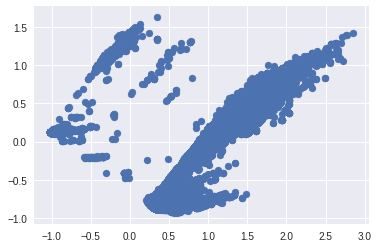

In [116]:
plt.scatter(pc_dims[:, 0], pc_dims[:, 1])

In [119]:
application_test[apartment_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Data columns (total 47 columns):
APARTMENTS_AVG                  24857 non-null float64
BASEMENTAREA_AVG                21103 non-null float64
YEARS_BEGINEXPLUATATION_AVG     25888 non-null float64
YEARS_BUILD_AVG                 16926 non-null float64
COMMONAREA_AVG                  15249 non-null float64
ELEVATORS_AVG                   23555 non-null float64
ENTRANCES_AVG                   25165 non-null float64
FLOORSMAX_AVG                   25423 non-null float64
FLOORSMIN_AVG                   16278 non-null float64
LANDAREA_AVG                    20490 non-null float64
LIVINGAPARTMENTS_AVG            15964 non-null float64
LIVINGAREA_AVG                  25192 non-null float64
NONLIVINGAPARTMENTS_AVG         15397 non-null float64
NONLIVINGAREA_AVG               22660 non-null float64
APARTMENTS_MODE                 24857 non-null float64
BASEMENTAREA_MODE               21103 non-null float64
YEARS_BEGIN

### bureau 

In [122]:
bureau = pd.read_csv('/home/neha/Desktop/code/ML/Kaggle/home_credit_default_risk/data/bureau.csv')
bureau.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
SK_ID_CURR                int64
SK_ID_BUREAU              int64
CREDIT_ACTIVE             object
CREDIT_CURRENCY           object
DAYS_CREDIT               int64
CREDIT_DAY_OVERDUE        int64
DAYS_CREDIT_ENDDATE       float64
DAYS_ENDDATE_FACT         float64
AMT_CREDIT_MAX_OVERDUE    float64
CNT_CREDIT_PROLONG        int64
AMT_CREDIT_SUM            float64
AMT_CREDIT_SUM_DEBT       float64
AMT_CREDIT_SUM_LIMIT      float64
AMT_CREDIT_SUM_OVERDUE    float64
CREDIT_TYPE               object
DAYS_CREDIT_UPDATE        int64
AMT_ANNUITY               float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB


In [124]:
bureau.CREDIT_ACTIVE.unique()

array(['Closed', 'Active', 'Sold', 'Bad debt'], dtype=object)

In [126]:
bureau.CREDIT_ACTIVE.value_counts()

Closed      1079273
Active       630607
Sold           6527
Bad debt         21
Name: CREDIT_ACTIVE, dtype: int64

In [128]:
bureau.CREDIT_CURRENCY.unique()

array(['currency 1', 'currency 2', 'currency 4', 'currency 3'], dtype=object)

In [130]:
bureau.CREDIT_CURRENCY.value_counts()

currency 1    1715020
currency 2       1224
currency 3        174
currency 4         10
Name: CREDIT_CURRENCY, dtype: int64

In [133]:
bureau.DAYS_CREDIT.describe()

count    1.716428e+06
mean    -1.142108e+03
std      7.951649e+02
min     -2.922000e+03
25%     -1.666000e+03
50%     -9.870000e+02
75%     -4.740000e+02
max      0.000000e+00
Name: DAYS_CREDIT, dtype: float64

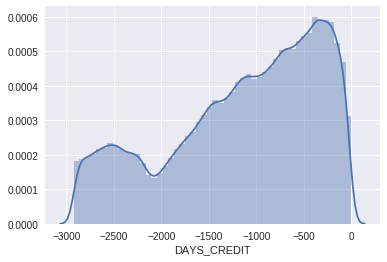

In [136]:
sns.distplot(bureau.DAYS_CREDIT)

In [142]:
(bureau.DAYS_CREDIT == 0).sum()

25

In [143]:
bureau.CREDIT_DAY_OVERDUE.describe()

count    1.716428e+06
mean     8.181666e-01
std      3.654443e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.792000e+03
Name: CREDIT_DAY_OVERDUE, dtype: float64

In [141]:
(bureau.CREDIT_DAY_OVERDUE == 0).sum()

1712211

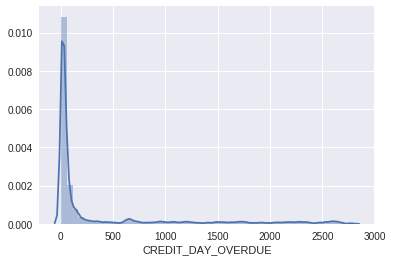

In [139]:
sns.distplot(bureau[bureau.CREDIT_DAY_OVERDUE > 0].CREDIT_DAY_OVERDUE)

### Bureau Balance

In [5]:
bureau_balance = pd.read_csv('/home/neha/Desktop/code/ML/Kaggle/home_credit_default_risk/data/bureau_balance.csv')
bureau_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
SK_ID_BUREAU      int64
MONTHS_BALANCE    int64
STATUS            object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB


In [6]:
bureau_balance.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [7]:
bureau_balance.STATUS.unique()

array(['C', '0', 'X', '1', '2', '3', '5', '4'], dtype=object)

In [10]:
bureau_balance.STATUS.value_counts()

C    13646993
0     7499507
X     5810482
1      242347
5       62406
2       23419
3        8924
4        5847
Name: STATUS, dtype: int64

### Previous application

In [11]:
previous_application = pd.read_csv('/home/neha/Desktop/code/ML/Kaggle/home_credit_default_risk/data/previous_application.csv')
previous_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
SK_ID_PREV                     1670214 non-null int64
SK_ID_CURR                     1670214 non-null int64
NAME_CONTRACT_TYPE             1670214 non-null object
AMT_ANNUITY                    1297979 non-null float64
AMT_APPLICATION                1670214 non-null float64
AMT_CREDIT                     1670213 non-null float64
AMT_DOWN_PAYMENT               774370 non-null float64
AMT_GOODS_PRICE                1284699 non-null float64
WEEKDAY_APPR_PROCESS_START     1670214 non-null object
HOUR_APPR_PROCESS_START        1670214 non-null int64
FLAG_LAST_APPL_PER_CONTRACT    1670214 non-null object
NFLAG_LAST_APPL_IN_DAY         1670214 non-null int64
RATE_DOWN_PAYMENT              774370 non-null float64
RATE_INTEREST_PRIMARY          5951 non-null float64
RATE_INTEREST_PRIVILEGED       5951 non-null float64
NAME_CASH_LOAN_PURPOSE         1670214 non-null object
NAME_CONTRA

In [12]:
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
